# Lab3 - Introduction to Deep Neural Network
- Nattapat Yuvasuta, 59070501028
- Niti Buesamae, 59070501047

Name your file to 59_1028_1047.ipynb

## Lab Instruction 

In this lab, you will learn to create a simple fully-connect neural network using Keras library with Tensorflow backend. We will play with MNIST data which is a Keras build-in dataset. 

See http://yann.lecun.com/exdb/mnist

First, import all the library that we will use in this lab

In [1]:
import keras
import numpy as np

C:\Users\Nz-zero\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

### Load Data ###
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#################

### 1. Learn About the Data

Understand your data. For example, its shape, format, datatype, structure, distribution, data classes, etc.

In [3]:
print('Feature type: %s'%type(train_images))
print('Label type: %s'%type(train_labels))

Feature type: <class 'numpy.ndarray'>
Label type: <class 'numpy.ndarray'>


In [4]:
print('Feature data type: %s'%train_images.dtype)
print('Label data type: %s'%train_labels.dtype)

Feature data type: uint8
Label data type: uint8


In [5]:
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


In [6]:
print('Train_set Feature dimension: %s'%str(train_images.ndim))
print('Train_set Label dimension: %s'%str(train_labels.ndim))
print('Test_set Feature dimension: %s'%str(test_images.ndim))
print('Test_set Label dimension: %s'%str(test_labels.ndim))

Train_set Feature dimension: 3
Train_set Label dimension: 1
Test_set Feature dimension: 3
Test_set Label dimension: 1


### 2. Build Neural Network Model

Build a two-layer neural network using `Sequential()`
( See https://keras.io/models/sequential ) 
> INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID

with the hidden layer of size 512

See Keras Model: https://keras.io/models/about-keras-models/



In [7]:
from keras import models
from keras import layers

In [8]:
network = models.Sequential()

Linear is a neural network itself, the hidden layers is 512 nodes with a relu activation and choose 10 for all possible output ( number = 0-9)  

In [9]:
network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

Compile your model with the following argument.

```
optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy']
```

In [10]:
network.compile(optimizer='sgd',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Let's see how our model looklike using `.summary()`

In [11]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 3. Preprocessing

- Reshape the features data (flattern) and normalize the value to be between 0 and 1
- One-hot the target data

In [12]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [13]:
train_images = train_images.reshape(60000,28*28) # Reshape
train_images = train_images.astype('float32')/255 # Normalize

test_images = test_images.reshape(10000,28*28) # Reshape
test_images = test_images.astype('float32')/255 # Normalize

In [14]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


One-hot the target data from numerical to categorical

In [15]:
from keras.utils import to_categorical

In [16]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### 4. Model Training 

Use `.fit()` to train your neural network model and return the record of accuracy and loss value in each epoch

We will train model with 10 epoch (If you confident with your computer performance, you can trian model with more epoch.)

We will train with mini-batch method with each the batch size equal to 128 data.

To prevent the overfit with test set, we will split a current training data into 90% for training and 10% for validating model.

This process will take about a minute.

In [18]:
history = network.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 91us/step - loss: 1.1642 - acc: 0.7472 - val_loss: 0.5887 - val_acc: 0.8882
Epoch 2/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.5507 - acc: 0.8697 - val_loss: 0.4016 - val_acc: 0.9087
Epoch 3/10
54000/54000 [==============================] - 2s 30us/step - loss: 0.4391 - acc: 0.8871 - val_loss: 0.3380 - val_acc: 0.9198
Epoch 4/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.3893 - acc: 0.8953 - val_loss: 0.3055 - val_acc: 0.9232
Epoch 5/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.3593 - acc: 0.9022 - val_loss: 0.2837 - val_acc: 0.9287
Epoch 6/10
54000/54000 [==============================] - 2s 43us/step - loss: 0.3382 - acc: 0.9067 - val_loss: 0.2687 - val_acc: 0.9297
Epoch 7/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.3218 - acc: 0.9111 - val_loss: 0.2571 - val_acc:

We will plot the loss and accuracy of both train set and validate set over iteration.

In [ ]:
import  matplotlib.pyplot  as plt
%matplotlib inline

In [20]:
# The function argument is a record or history of the model during training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
def plot_acc_fn(history):

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()

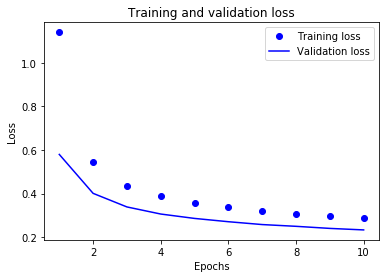

In [21]:
plot_loss_fn(history)

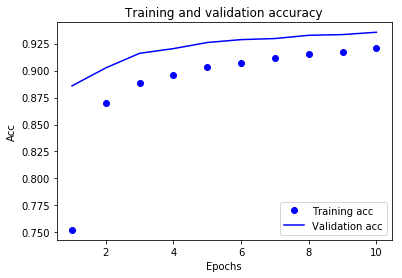

In [22]:
plot_acc_fn(history)

At which iteration does your model start to get overfit? give your reason.

**ANSWER**


From graph the accuracy of validation is better than training accuracy so our model doesn't get overfit at any point.

### 5. Model Evaluation

Evaluate your model with test set using `.evaluate()` and compare the result with the training set and validate set. Does your model overfit or underfit? How about the bias and variance?

In [23]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

10000/10000 [==============================] - 0s 37us/step
Test Loss: 0.09835423312559724
Test Accuracy: 0.972


In [24]:
train_loss, train_acc = network.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s' % (train_loss,train_acc))

60000/60000 [==============================] - 3s 44us/step
Train Loss: 0.08262258052118122
Train Accuracy: 0.9788166666666667


**ANSWER**

No, it doesn't overfit because the accuracy of train and test set is not so defferent. And for the same reason, our model seems to be high bias but low variance because our accuracy is good on average and the different between each run is not much different.

In [25]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Use confusion matrix to analyse the performance of your model. which class does your model classify poorly. What is your model precision and recall. 

In [26]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

### evaluate your model ###
print("Training----------")
yhat_train = network.predict(train_images)
yhat_train = np.argmax(yhat_train,axis = 1)
yhat_train2 = np.argmax(train_labels,axis = 1)

print(classification_report(yhat_train2, yhat_train))
print(confusion_matrix(yhat_train2, yhat_train))
print("Testing----------")
yhat_test = network.predict(test_images)
yhat_test = np.argmax(yhat_test,axis = 1)
yhat_test2 = np.argmax(test_labels,axis = 1)

print(classification_report(yhat_test2, yhat_test))
print(confusion_matrix(yhat_test2, yhat_test))

Training----------
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      5923
          1       0.98      0.99      0.98      6742
          2       0.98      0.98      0.98      5958
          3       0.98      0.97      0.97      6131
          4       0.98      0.98      0.98      5842
          5       0.98      0.98      0.98      5421
          6       0.98      0.99      0.99      5918
          7       0.98      0.98      0.98      6265
          8       0.98      0.97      0.97      5851
          9       0.97      0.97      0.97      5949

avg / total       0.98      0.98      0.98     60000

[[5837    1    6    5    7   12   22    6   17   10]
 [   1 6664   26    9   10    0    4   10   16    2]
 [   8   12 5837   17   19    5    6   31   17    6]
 [   3    9   44 5942    2   45    2   25   39   20]
 [   4   13   12    0 5724    2   15    7    6   59]
 [   9    8    8   31    6 5296   26    3   20   14]
 [  17    8    4    2   


**ANSWER**

Both precision and recall of a model is 92% and label '5' is the most poorly predicted by model because F1 score is the lowest in both train and test classification reports.

### 6. Model tuning

Try to tune your model by: 
1. Adjust the learning rate of your optimizer by increasing and decreasing learning rate and see how it affect your model.
2. Try using different optimizer ('sgd', 'rmspop', 'adagrad', 'adam', See https://keras.io/optimizers ) and see which one converge faster.
3. Change your the model structure by adding more hidden layer with any number of node and see how it affect your model.

Learning rate adjust to 50 to see what if will happen if it too large

In [27]:
def plot_all_acc_fn(sgd,adagard,rms,adam):
    
    
    sgd_acc = sgd.history['acc']
    sgd_val_acc = sgd.history['val_acc']
    
    epochs = range(1, len(sgd_acc) + 1)
    
    plt.plot(epochs, sgd_val_acc, 'yo', label='Validation acc sgd')
    plt.legend()
    
    adagard_acc = adagard.history['acc']
    adagard_val_acc = adagard.history['val_acc']
    
    epochs = range(1, len(adagard_acc) + 1)

    plt.plot(epochs, adagard_val_acc, 'go', label='Validation acc adagard')
    
    rms_acc = rms.history['acc']
    rms_val_acc = rms.history['val_acc']
    
    epochs = range(1, len(rms_acc) + 1)

    plt.plot(epochs, rms_val_acc, 'bo', label='Validation acc rmspop')
    
    adam_acc = adam.history['acc']
    adam_val_acc = adam.history['val_acc']
    
    epochs = range(1, len(adam_acc) + 1)

    plt.plot(epochs, adam_val_acc, 'ro', label='Validation acc adam')

    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()

In [28]:
from keras import optimizers
network_sgd = models.Sequential()
network_sgd.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network_sgd.add(layers.Dense(10, activation='sigmoid'))

sgd = optimizers.sgd(lr = 50.00) 
network_sgd.compile(loss='categorical_crossentropy',
               metrics=['accuracy'],optimizer=sgd)

In [29]:
history_de = network_sgd.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 47us/step - loss: 8.9286 - acc: 0.0986 - val_loss: 8.7888 - val_acc: 0.0978
Epoch 2/10
54000/54000 [==============================] - 2s 42us/step - loss: 8.9532 - acc: 0.0988 - val_loss: 8.7888 - val_acc: 0.0978
Epoch 3/10
54000/54000 [==============================] - 2s 43us/step - loss: 8.9532 - acc: 0.0988 - val_loss: 8.7888 - val_acc: 0.0978
Epoch 4/10
54000/54000 [==============================] - 2s 42us/step - loss: 8.9532 - acc: 0.0988 - val_loss: 8.7888 - val_acc: 0.0978
Epoch 5/10
54000/54000 [==============================] - 3s 47us/step - loss: 8.9532 - acc: 0.0988 - val_loss: 8.7888 - val_acc: 0.0978
Epoch 6/10
54000/54000 [==============================] - 2s 42us/step - loss: 8.9532 - acc: 0.0988 - val_loss: 8.7888 - val_acc: 0.0978
Epoch 7/10
54000/54000 [==============================] - 2s 43us/step - loss: 8.9532 - acc: 0.0988 - val_loss: 8.7888 - val_acc:

Learning rate adjust to 0.0001 to see what if it too small

In [30]:
from keras import optimizers
network_sgd = models.Sequential()
network_sgd.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network_sgd.add(layers.Dense(10, activation='sigmoid'))

sgd = optimizers.sgd(lr = 0.0001) 
network_sgd.compile(loss='categorical_crossentropy',
               metrics=['accuracy'],optimizer=sgd)

In [31]:
history_de = network_sgd.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 45us/step - loss: 2.3270 - acc: 0.0814 - val_loss: 2.3160 - val_acc: 0.0817
Epoch 2/10
54000/54000 [==============================] - 2s 45us/step - loss: 2.3099 - acc: 0.0899 - val_loss: 2.2992 - val_acc: 0.0902
Epoch 3/10
54000/54000 [==============================] - 2s 41us/step - loss: 2.2942 - acc: 0.1007 - val_loss: 2.2837 - val_acc: 0.1027
Epoch 4/10
54000/54000 [==============================] - 2s 41us/step - loss: 2.2795 - acc: 0.1137 - val_loss: 2.2691 - val_acc: 0.1172
Epoch 5/10
54000/54000 [==============================] - 2s 42us/step - loss: 2.2657 - acc: 0.1291 - val_loss: 2.2554 - val_acc: 0.1338
Epoch 6/10
54000/54000 [==============================] - 2s 42us/step - loss: 2.2527 - acc: 0.1485 - val_loss: 2.2423 - val_acc: 0.1577
Epoch 7/10
54000/54000 [==============================] - 2s 46us/step - loss: 2.2403 - acc: 0.1706 - val_loss: 2.2297 - val_acc:

Learning rate adjust to 0.01 to see what if we use recommended value

In [32]:

from keras import optimizers
network_sgd = models.Sequential()
network_sgd.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network_sgd.add(layers.Dense(10, activation='sigmoid'))

sgd = optimizers.sgd(lr = 0.01)
network_sgd.compile(loss='categorical_crossentropy',
               metrics=['accuracy'],optimizer=sgd)

In [33]:
history_in = network_sgd.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 45us/step - loss: 1.7033 - acc: 0.6269 - val_loss: 0.9201 - val_acc: 0.8620
Epoch 2/10
54000/54000 [==============================] - 2s 42us/step - loss: 0.7103 - acc: 0.8530 - val_loss: 0.4809 - val_acc: 0.9037
Epoch 3/10
54000/54000 [==============================] - 2s 42us/step - loss: 0.4953 - acc: 0.8798 - val_loss: 0.3755 - val_acc: 0.9108
Epoch 4/10
54000/54000 [==============================] - 2s 42us/step - loss: 0.4211 - acc: 0.8918 - val_loss: 0.3282 - val_acc: 0.9185
Epoch 5/10
54000/54000 [==============================] - 3s 46us/step - loss: 0.3813 - acc: 0.8989 - val_loss: 0.3005 - val_acc: 0.9213
Epoch 6/10
54000/54000 [==============================] - 2s 43us/step - loss: 0.3552 - acc: 0.9041 - val_loss: 0.2832 - val_acc: 0.9250
Epoch 7/10
54000/54000 [==============================] - 2s 45us/step - loss: 0.3363 - acc: 0.9085 - val_loss: 0.2701 - val_acc:

adjust optimizer to sgd

In [34]:
# sgd optimizer
from keras import optimizers
network_sgd = models.Sequential()
network_sgd.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network_sgd.add(layers.Dense(10, activation='sigmoid'))

sgd = optimizers.sgd()
network_sgd.compile(loss='categorical_crossentropy',
               metrics=['accuracy'],optimizer=sgd)

In [35]:
history_sgd = network_sgd.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 47us/step - loss: 1.6420 - acc: 0.6519 - val_loss: 0.8576 - val_acc: 0.8682
Epoch 2/10
54000/54000 [==============================] - 3s 48us/step - loss: 0.6840 - acc: 0.8523 - val_loss: 0.4684 - val_acc: 0.9017
Epoch 3/10
54000/54000 [==============================] - 2s 44us/step - loss: 0.4881 - acc: 0.8795 - val_loss: 0.3710 - val_acc: 0.9125
Epoch 4/10
54000/54000 [==============================] - 2s 44us/step - loss: 0.4177 - acc: 0.8910 - val_loss: 0.3261 - val_acc: 0.9183
Epoch 5/10
54000/54000 [==============================] - 2s 44us/step - loss: 0.3795 - acc: 0.8989 - val_loss: 0.3016 - val_acc: 0.9193
Epoch 6/10
54000/54000 [==============================] - 2s 46us/step - loss: 0.3544 - acc: 0.9035 - val_loss: 0.2819 - val_acc: 0.9258
Epoch 7/10
54000/54000 [==============================] - 2s 44us/step - loss: 0.3357 - acc: 0.9081 - val_loss: 0.2703 - val_acc:

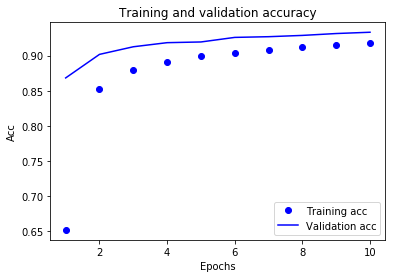

In [36]:
plot_acc_fn(history_sgd)

adjust optimizer to adagard

In [37]:
# adagrad optimizer
from keras import optimizers
network_adagrad = models.Sequential()
network_adagrad.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network_adagrad.add(layers.Dense(10, activation='sigmoid'))

adagrad = optimizers.adagrad()
network_adagrad.compile(loss='categorical_crossentropy',
               metrics=['accuracy'],optimizer=adagrad)

In [38]:
history4 = network_adagrad.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 59us/step - loss: 0.2634 - acc: 0.9230 - val_loss: 0.1249 - val_acc: 0.9653
Epoch 2/10
54000/54000 [==============================] - 3s 52us/step - loss: 0.1274 - acc: 0.9637 - val_loss: 0.1015 - val_acc: 0.9710
Epoch 3/10
54000/54000 [==============================] - 3s 52us/step - loss: 0.0977 - acc: 0.9724 - val_loss: 0.0902 - val_acc: 0.9758
Epoch 4/10
54000/54000 [==============================] - 3s 56us/step - loss: 0.0806 - acc: 0.9775 - val_loss: 0.0827 - val_acc: 0.9762
Epoch 5/10
54000/54000 [==============================] - 3s 55us/step - loss: 0.0691 - acc: 0.9815 - val_loss: 0.0794 - val_acc: 0.9770
Epoch 6/10
54000/54000 [==============================] - 3s 55us/step - loss: 0.0608 - acc: 0.9836 - val_loss: 0.0745 - val_acc: 0.9783
Epoch 7/10
54000/54000 [==============================] - 3s 50us/step - loss: 0.0546 - acc: 0.9855 - val_loss: 0.0717 - val_acc:

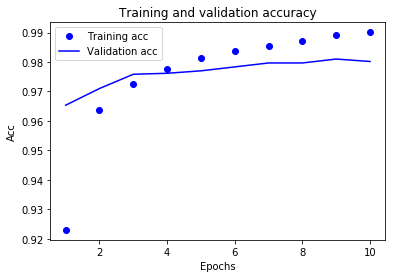

In [39]:
plot_acc_fn(history4)

adjust optimizer to rmsprop

In [40]:
# rmsprop optimizer
from keras import optimizers
network_rmsprop = models.Sequential()
network_rmsprop.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network_rmsprop.add(layers.Dense(10, activation='sigmoid'))

rmsprop = optimizers.rmsprop()
network_rmsprop.compile(loss='categorical_crossentropy',
               metrics=['accuracy'],optimizer=rmsprop)

In [41]:
history5 = network_rmsprop.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 60us/step - loss: 0.3051 - acc: 0.9126 - val_loss: 0.1327 - val_acc: 0.9607
Epoch 2/10
54000/54000 [==============================] - 3s 56us/step - loss: 0.1265 - acc: 0.9620 - val_loss: 0.1058 - val_acc: 0.9703
Epoch 3/10
54000/54000 [==============================] - 3s 58us/step - loss: 0.0832 - acc: 0.9751 - val_loss: 0.0808 - val_acc: 0.9755
Epoch 4/10
54000/54000 [==============================] - 3s 61us/step - loss: 0.0618 - acc: 0.9813 - val_loss: 0.0791 - val_acc: 0.9763
Epoch 5/10
54000/54000 [==============================] - 3s 60us/step - loss: 0.0462 - acc: 0.9863 - val_loss: 0.0762 - val_acc: 0.9792
Epoch 6/10
54000/54000 [==============================] - 3s 56us/step - loss: 0.0354 - acc: 0.9890 - val_loss: 0.0773 - val_acc: 0.9808
Epoch 7/10
54000/54000 [==============================] - 3s 55us/step - loss: 0.0273 - acc: 0.9918 - val_loss: 0.0715 - val_acc:

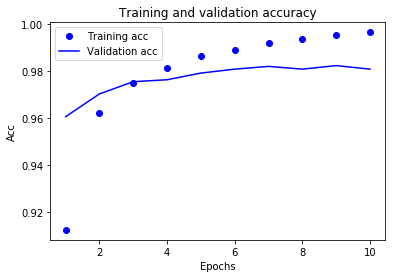

In [42]:
plot_acc_fn(history5)

adjust optimizer to adam

In [43]:
# adam optimizer
from keras import optimizers
network_adam = models.Sequential()
network_adam.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network_adam.add(layers.Dense(10, activation='sigmoid'))

adam = optimizers.adam()
network_adam.compile(loss='categorical_crossentropy',
               metrics=['accuracy'],optimizer=adam)

In [44]:
history6 = network_adam.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 82us/step - loss: 0.3111 - acc: 0.9151 - val_loss: 0.1210 - val_acc: 0.9658
Epoch 2/10
54000/54000 [==============================] - 4s 72us/step - loss: 0.1246 - acc: 0.9635 - val_loss: 0.0928 - val_acc: 0.9742
Epoch 3/10
54000/54000 [==============================] - 3s 65us/step - loss: 0.0810 - acc: 0.9763 - val_loss: 0.0792 - val_acc: 0.9758
Epoch 4/10
54000/54000 [==============================] - 4s 69us/step - loss: 0.0586 - acc: 0.9829 - val_loss: 0.0814 - val_acc: 0.9773
Epoch 5/10
54000/54000 [==============================] - 3s 64us/step - loss: 0.0426 - acc: 0.9872 - val_loss: 0.0722 - val_acc: 0.9787
Epoch 6/10
54000/54000 [==============================] - 3s 64us/step - loss: 0.0336 - acc: 0.9907 - val_loss: 0.0742 - val_acc: 0.9795
Epoch 7/10
54000/54000 [==============================] - 3s 64us/step - loss: 0.0263 - acc: 0.9927 - val_loss: 0.0666 - val_acc:

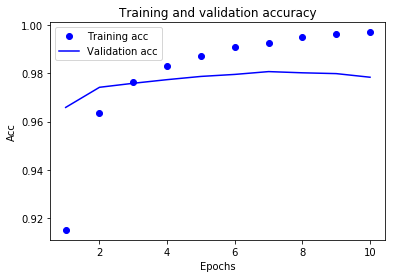

In [45]:
plot_acc_fn(history6)

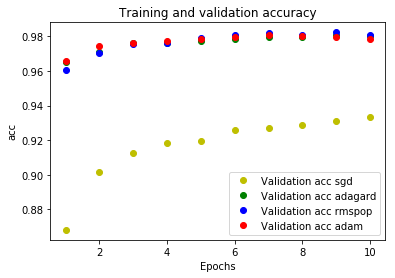

In [46]:
plot_all_acc_fn(history_sgd,history4,history5,history6)

Change model structure by add more hidden layer 
Input -> Linear -> Relu -> Linear -> Relu -> Linear -> Sigmoid

In [47]:
from keras import optimizers
network_plus_layer = models.Sequential()
network_plus_layer.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network_plus_layer.add(layers.Dense(256, activation='relu'))
network_plus_layer.add(layers.Dense(10, activation='sigmoid'))

sgd = optimizers.sgd(lr = 0.01) 
network_plus_layer.compile(loss='categorical_crossentropy',
               metrics=['accuracy'],optimizer=sgd)

In [ ]:
history_plus_layer = network_plus_layer.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 61us/step - loss: 1.5433 - acc: 0.6636 - val_loss: 0.6587 - val_acc: 0.8742
Epoch 2/10
54000/54000 [==============================] - 3s 54us/step - loss: 0.5404 - acc: 0.8691 - val_loss: 0.3652 - val_acc: 0.9128
Epoch 3/10
54000/54000 [==============================] - 3s 57us/step - loss: 0.3972 - acc: 0.8935 - val_loss: 0.2978 - val_acc: 0.9212
Epoch 4/10
54000/54000 [==============================] - 3s 54us/step - loss: 0.3455 - acc: 0.9049 - val_loss: 0.2670 - val_acc: 0.9280
Epoch 5/10
35712/54000 [==================>...........] - ETA: 0s - loss: 0.3203 - acc: 0.9102

Add more layers to see the differences

In [ ]:
from keras import optimizers
network_plus_layer2 = models.Sequential()
network_plus_layer2.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network_plus_layer2.add(layers.Dense(256, activation='relu'))
network_plus_layer2.add(layers.Dense(128, activation='relu'))
network_plus_layer2.add(layers.Dense(10, activation='sigmoid'))

sgd = optimizers.sgd(lr = 0.01) 
network_plus_layer2.compile(loss='categorical_crossentropy',
               metrics=['accuracy'],optimizer=sgd)

In [ ]:
history_plus_layer2 = network_plus_layer2.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.1)

What if we decrease the number of nodes?

### 7. Discussion and Result
Write down your analysis from previous step

**ANSWER**

1.) Learning rate affects directly on how fast it converge to the optimum point and weight. Too big of learning rate can result in model hard stuck on local minimum. Too small learning rate may not differs from brute-force so the optimal learning rate is essential. 

2.) From multi-plotting, Adam is the best optimizer because it has the highest validation accuracy of most of the time.

3.) By adding more hidden layers, both initial and during learning process of loss and accuracy have improve and converge to their optimal point at faster rate.
